/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


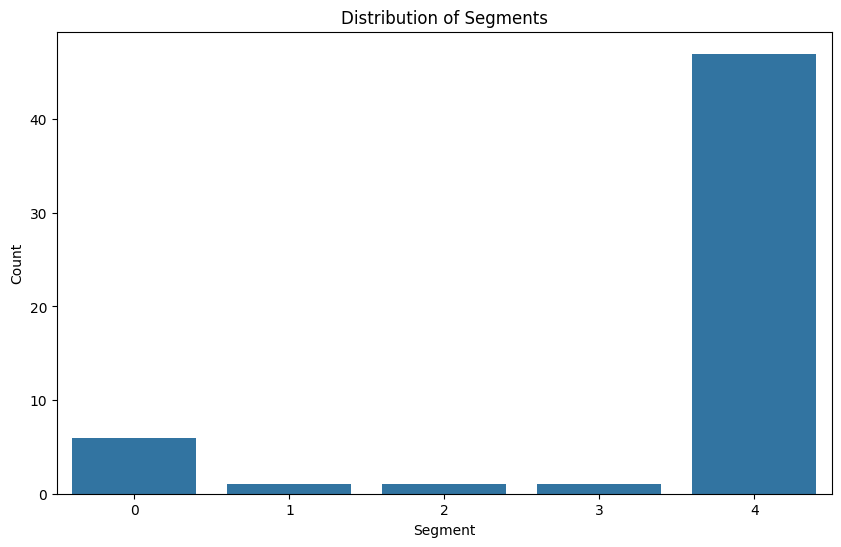

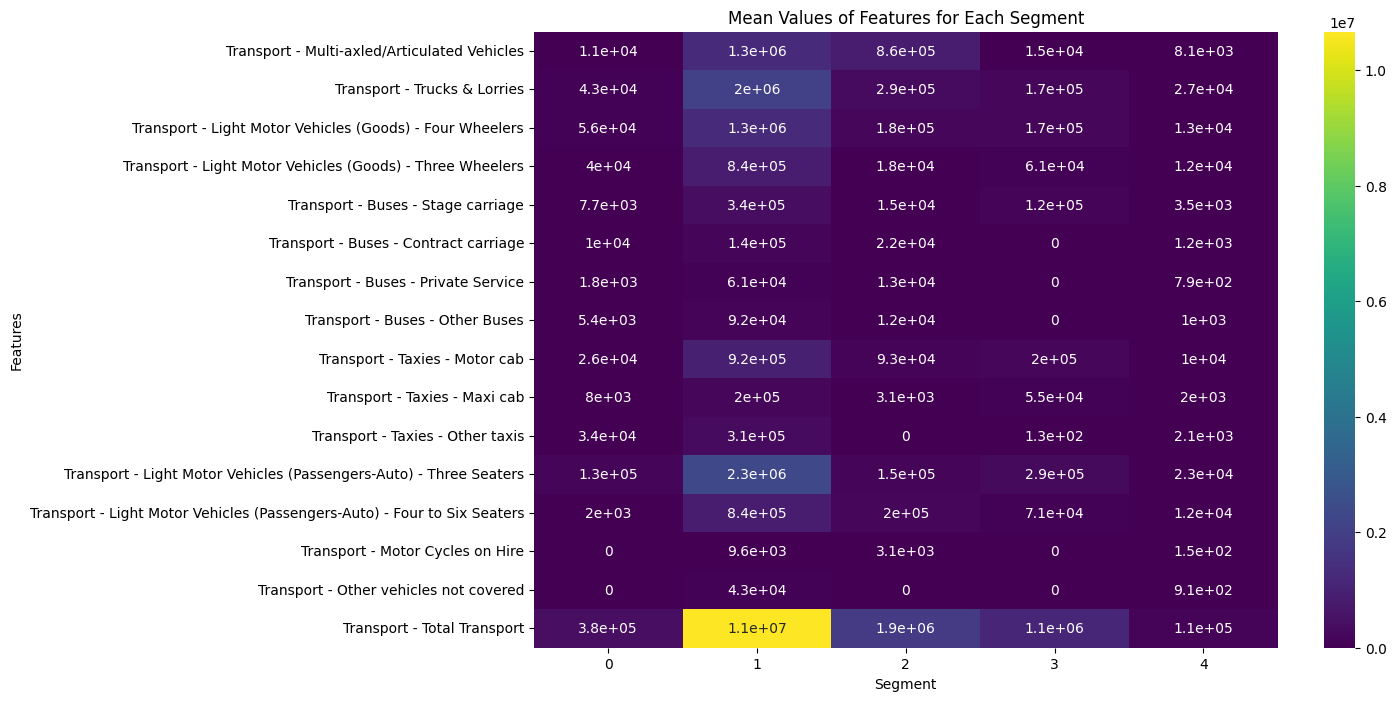

Potential Profit: INR 500000


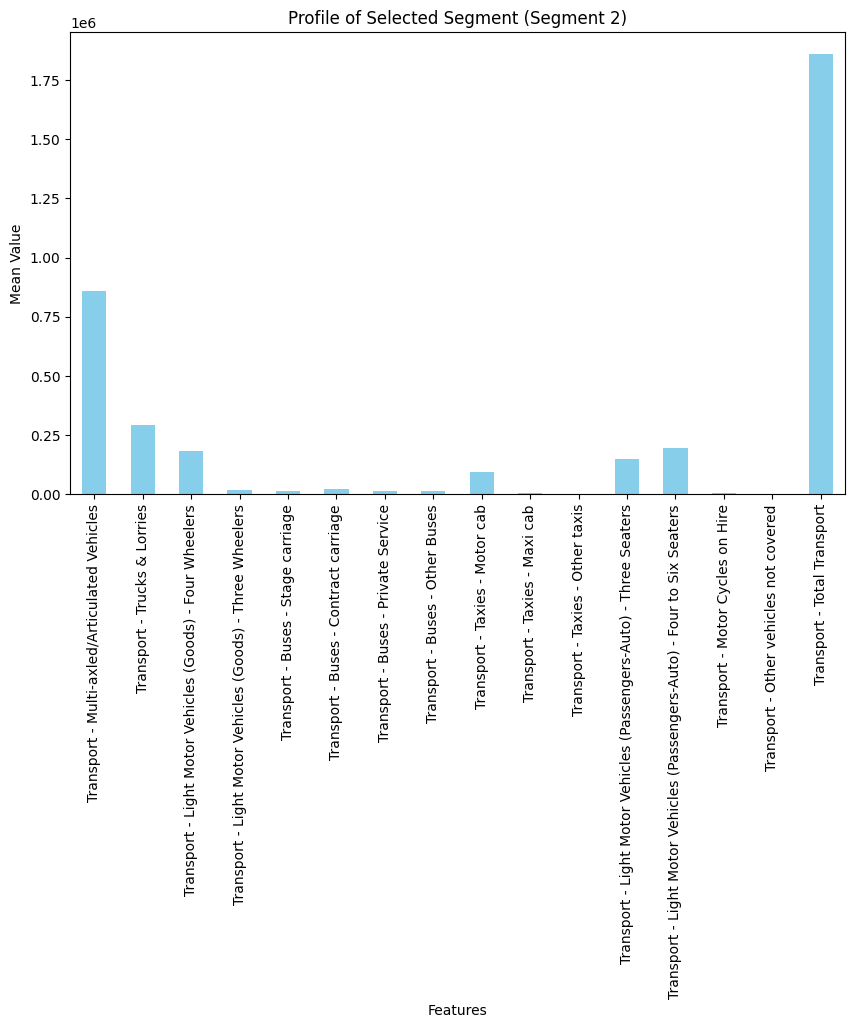

In [3]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets, ensuring proper header handling
usage_df = pd.read_csv('/content/Usage.csv', header=0) # Explicitly set header to the first row
vehicle_df = pd.read_csv('/content/Vehicle.csv', header=0) # Explicitly set header to the first row

# Check for missing values in both datasets
usage_missing = usage_df.isnull().sum()
vehicle_missing = vehicle_df.isnull().sum()

# Fill missing values in usage_df with column means, excluding non-numeric columns
numeric_columns = usage_df.select_dtypes(include=[float, int]).columns
usage_df[numeric_columns] = usage_df[numeric_columns].fillna(usage_df[numeric_columns].mean())

# Fill missing values in vehicle_df with column means, excluding non-numeric columns
numeric_columns_vehicle = vehicle_df.select_dtypes(include=[float, int]).columns
vehicle_df[numeric_columns_vehicle] = vehicle_df[numeric_columns_vehicle].fillna(vehicle_df[numeric_columns_vehicle].mean())

# Standardize the data
scaler = StandardScaler()
usage_scaled = scaler.fit_transform(usage_df.select_dtypes(include=[float, int]))

# Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
usage_df['Segment'] = kmeans.fit_predict(usage_scaled)

# Profiling Segments
# Select only numeric columns for calculating the mean
segments_profile = usage_df.groupby('Segment').mean(numeric_only=True)

# Visualize the distribution of segments
plt.figure(figsize=(10, 6))
sns.countplot(x='Segment', data=usage_df)
plt.title('Distribution of Segments')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.show()

# Visualize the mean values of features for each segment
plt.figure(figsize=(12, 8))
sns.heatmap(segments_profile.T, annot=True, cmap='viridis')
plt.title('Mean Values of Features for Each Segment')
plt.xlabel('Segment')
plt.ylabel('Features')
plt.show()

# Evaluate segments based on size
segment_sizes = usage_df['Segment'].value_counts()

# Assume segment 2 is selected for further analysis
selected_segment = 2
target_price_range = 500000  # Example price range in INR

# Potential customer base
customer_base = segment_sizes[selected_segment]

# Potential profit
potential_profit = customer_base * target_price_range
print(f"Potential Profit: INR {potential_profit}")

# Visualizing the selected segment characteristics
selected_segment_profile = segments_profile.loc[selected_segment]

plt.figure(figsize=(10, 6))
selected_segment_profile.plot(kind='bar', color='skyblue')
plt.title(f'Profile of Selected Segment (Segment {selected_segment})')
plt.xlabel('Features')
plt.ylabel('Mean Value')
plt.show()